# Визуализация данных с помощью pandas и matplotlib

## 0. Загрузка данных
* SQL
* excel
* csv

In [55]:
# импорты
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# выгрузка данных из excel
example = pd.read_excel('lesson_01.xlsx')
example.head()
example.shape

(1500, 7)

In [ ]:
# выгрузка из БД
# conn = MySQLdb(...)
# df = pd.read_sql_query('SELECT * FROM table', con=conn)



In [39]:
# выгрузка из csv

df = pd.read_csv('acs2015_census_tract_data.csv.gz')
df.head()
df.shape

(74001, 37)

## 01. Фильтрация таблиц pandas

In [4]:
# Задача 1
# Найти сотрудников у которых зп > 100000 

employees = pd.DataFrame(
    {
        'name': ['Alice', 'Bob', 'Carol', 'Frank', 'Eve'],
        'position': ['Senior', 'Middle', 'Lead', 'Junior', 'Middle'],
        'salary': [100000, 99817, 122908, 88123, 93121]
    }  
)
employees

,name,position,salary
0,Alice,Senior,100000
1,Bob,Middle,99817
2,Carol,Lead,122908
3,Frank,Junior,88123
4,Eve,Middle,93121


In [10]:
# Способ фильтрации 1 - обращение к ключу

# employees['salary']
# employees['salary'] >= 100000
employees[employees['salary'] >= 100000]

# сотрудники с зп>=100000 и должностью Lead
employees[(employees['salary'] >= 100000) & (employees['position'] == 'Lead')]

,name,position,salary
2,Carol,Lead,122908


In [12]:
# Способ 2 - запросe

# employees.query("salary >= 100000")
employees.query("salary >= 100000 & position == 'Lead'")

,name,position,salary
2,Carol,Lead,122908


In [31]:
# Способ 3 - атрибуты loc и iloc

# employees.loc[0:3, 'position']
employees.loc[employees['salary'] >= 100000, ['name', 'salary']]

# employees.iloc[1:3, 2]
# employees.iloc[:, 2]


mask = employees.iloc[:, 2:3].stack().apply(lambda x: int(x)>=100000).unstack()
employees[mask['salary']]

,name,position,salary
0,Alice,Senior,100000
2,Carol,Lead,122908


### Задача 2
* у нас имеются данные о перепеси населения в США за 2015 год
* определить список штатов, в которых процент темнокожего населения и уровень безработицы выше 50%.

In [41]:
df = pd.read_csv('acs2015_census_tract_data.csv.gz')
print(df.shape)
df.head()

(74001, 37)


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [49]:
# cписок колонок
df.columns

# df[['State', 'Black', 'Unemployment']].head()
df[(df['Black'] > 50) & (df['Unemployment'] > 50)]['State'].unique()

array(['District of Columbia', 'Florida', 'Georgia', 'Illinois',
       'Michigan', 'New York', 'Ohio', 'Pennsylvania', 'Texas'],
      dtype=object)

## Визуализация данных

### Задача 3
* изучить данные об отзывах о сортах вин

In [52]:
reviews = pd.read_csv('winemag-data_first150k.csv.gz')
print(reviews.shape)
reviews.head(10)

(150930, 10)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


<Axes: >

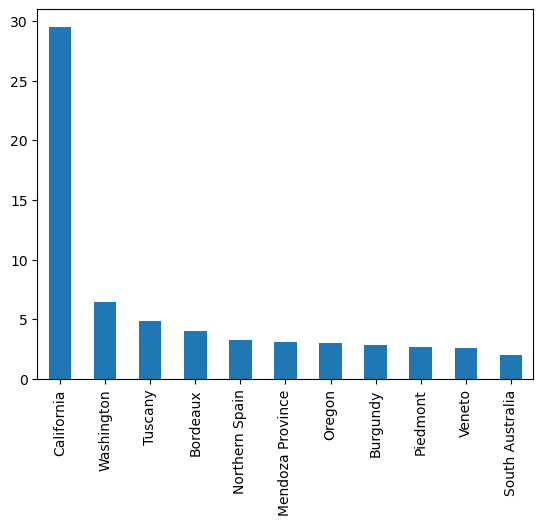

In [64]:
# Одномерные графики

# ТОП-10 наиболее встречающихся провинций
reviews['province'].value_counts().iloc[:11] / len(reviews)*100 # частотный анализ
(reviews['province'].value_counts().iloc[:11] / len(reviews)*100).plot.bar()



<Axes: ylabel='province'>

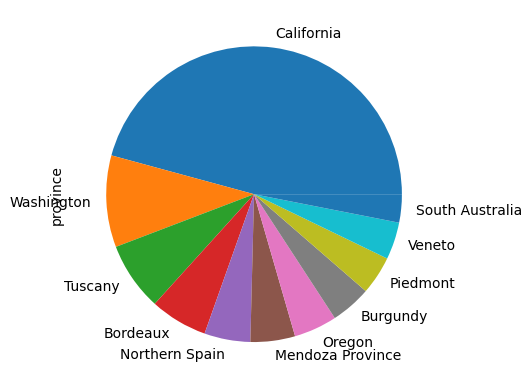

In [61]:
reviews['province'].value_counts().iloc[:11].plot.pie()

<Axes: >

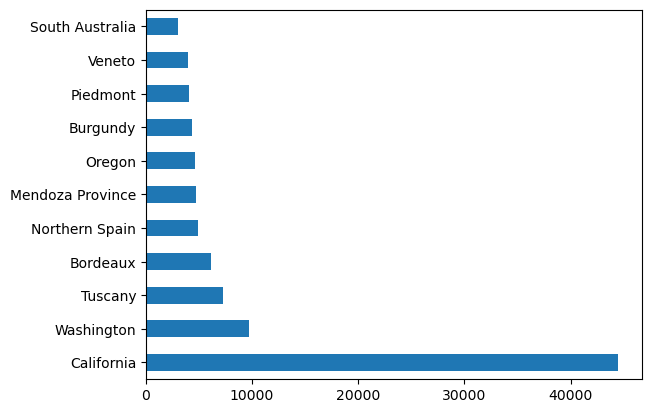

In [62]:
reviews['province'].value_counts().iloc[:11].plot.barh()

<Axes: >

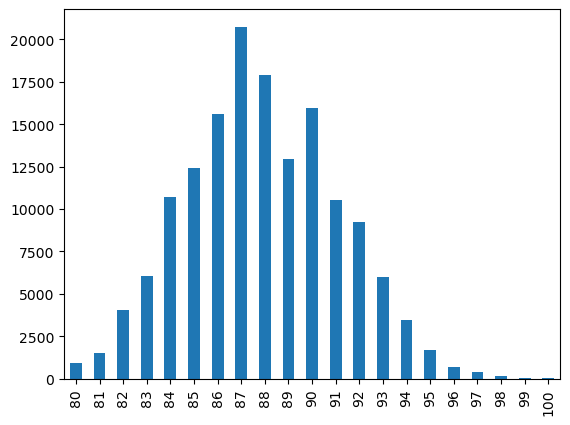

In [94]:
# Итоговые баллы по оценкам вина

# reviews['points'].value_counts().plot.bar()
reviews['points'].value_counts().sort_index().plot.bar()


<Axes: >

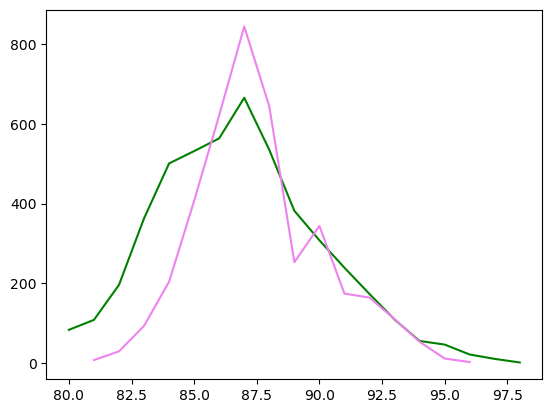

In [95]:
reviews[reviews['province'] == 'Northern Spain']['points'].value_counts().sort_index().plot.line(color='green')
reviews[reviews['province'] == 'Veneto']['points'].value_counts().sort_index().plot.line(color='violet')

<Axes: ylabel='Frequency'>

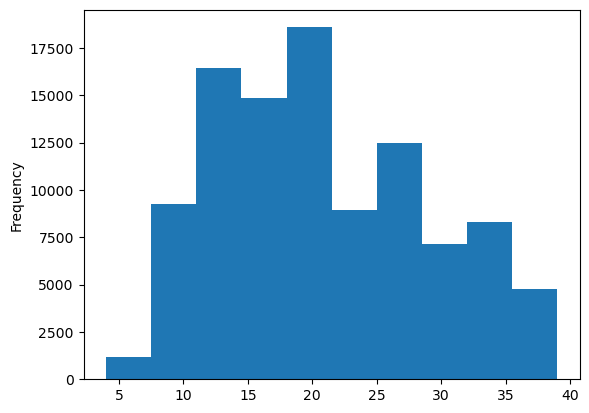

In [82]:
# Распредление по цене

reviews[reviews['price'] < 40]['price'].plot.hist()

<Axes: ylabel='Frequency'>

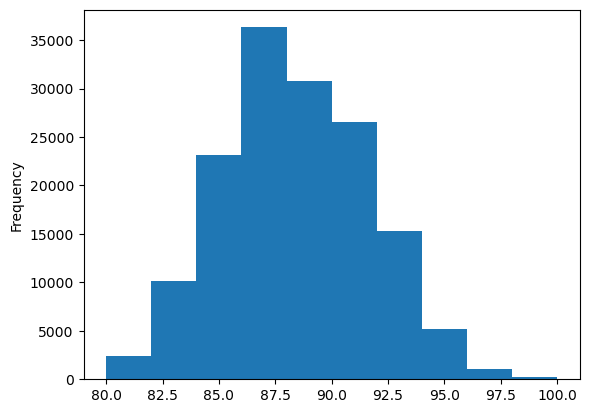

In [83]:
reviews['points'].plot.hist()

<Axes: xlabel='price', ylabel='points'>

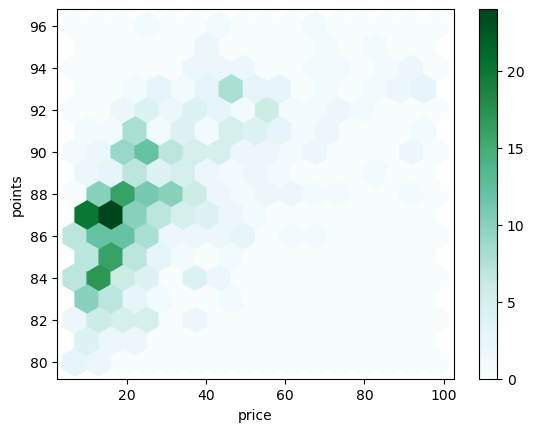

In [87]:
# Многомерные графики

# Диаграмма рассеяния - влияние одной переменной на другую

# reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points')
reviews[reviews['price'] < 100].sample(500).plot.hexbin(x='price', y='points', gridsize=15)

In [88]:
# топ-5 видов вина в датасете 
# для каждого балла количество упоминаний по каждому из вин

wine_counts = reviews[
    reviews['variety'].isin(list(reviews['variety'].value_counts().head(5).index))
        ].groupby(['variety','points'])['points'].count().unstack().T

wine_counts

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,86.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0
85,379.0,1058.0,1299.0,903.0,608.0
86,467.0,1205.0,1525.0,1260.0,919.0
87,679.0,1589.0,1887.0,1784.0,1375.0
88,741.0,1160.0,1513.0,1586.0,1366.0


<Axes: xlabel='points'>

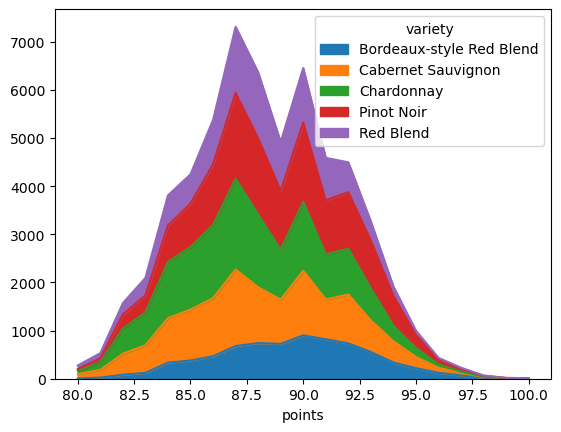

In [92]:
# wine_counts.plot.bar(stacked=True)
wine_counts.plot.area()

### Подграфики sublots()

<Axes: >

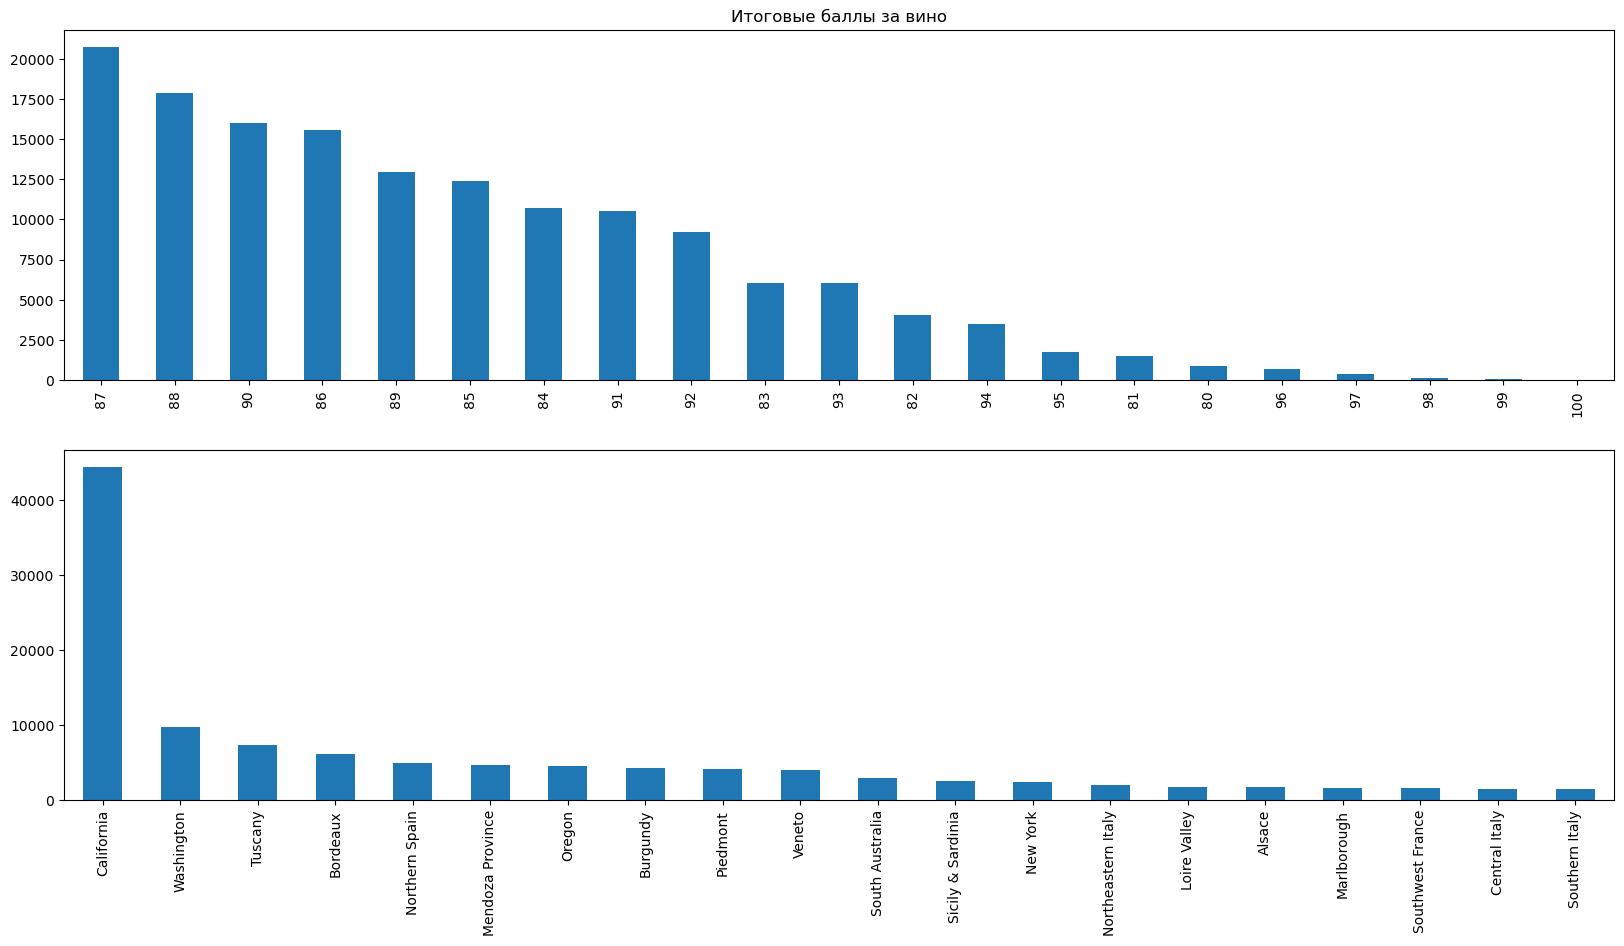

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

axes[0].set_title('Итоговые баллы за вино')
reviews['points'].value_counts().plot.bar(ax=axes[0])

reviews['province'].value_counts().head(20).plot.bar(ax=axes[1])

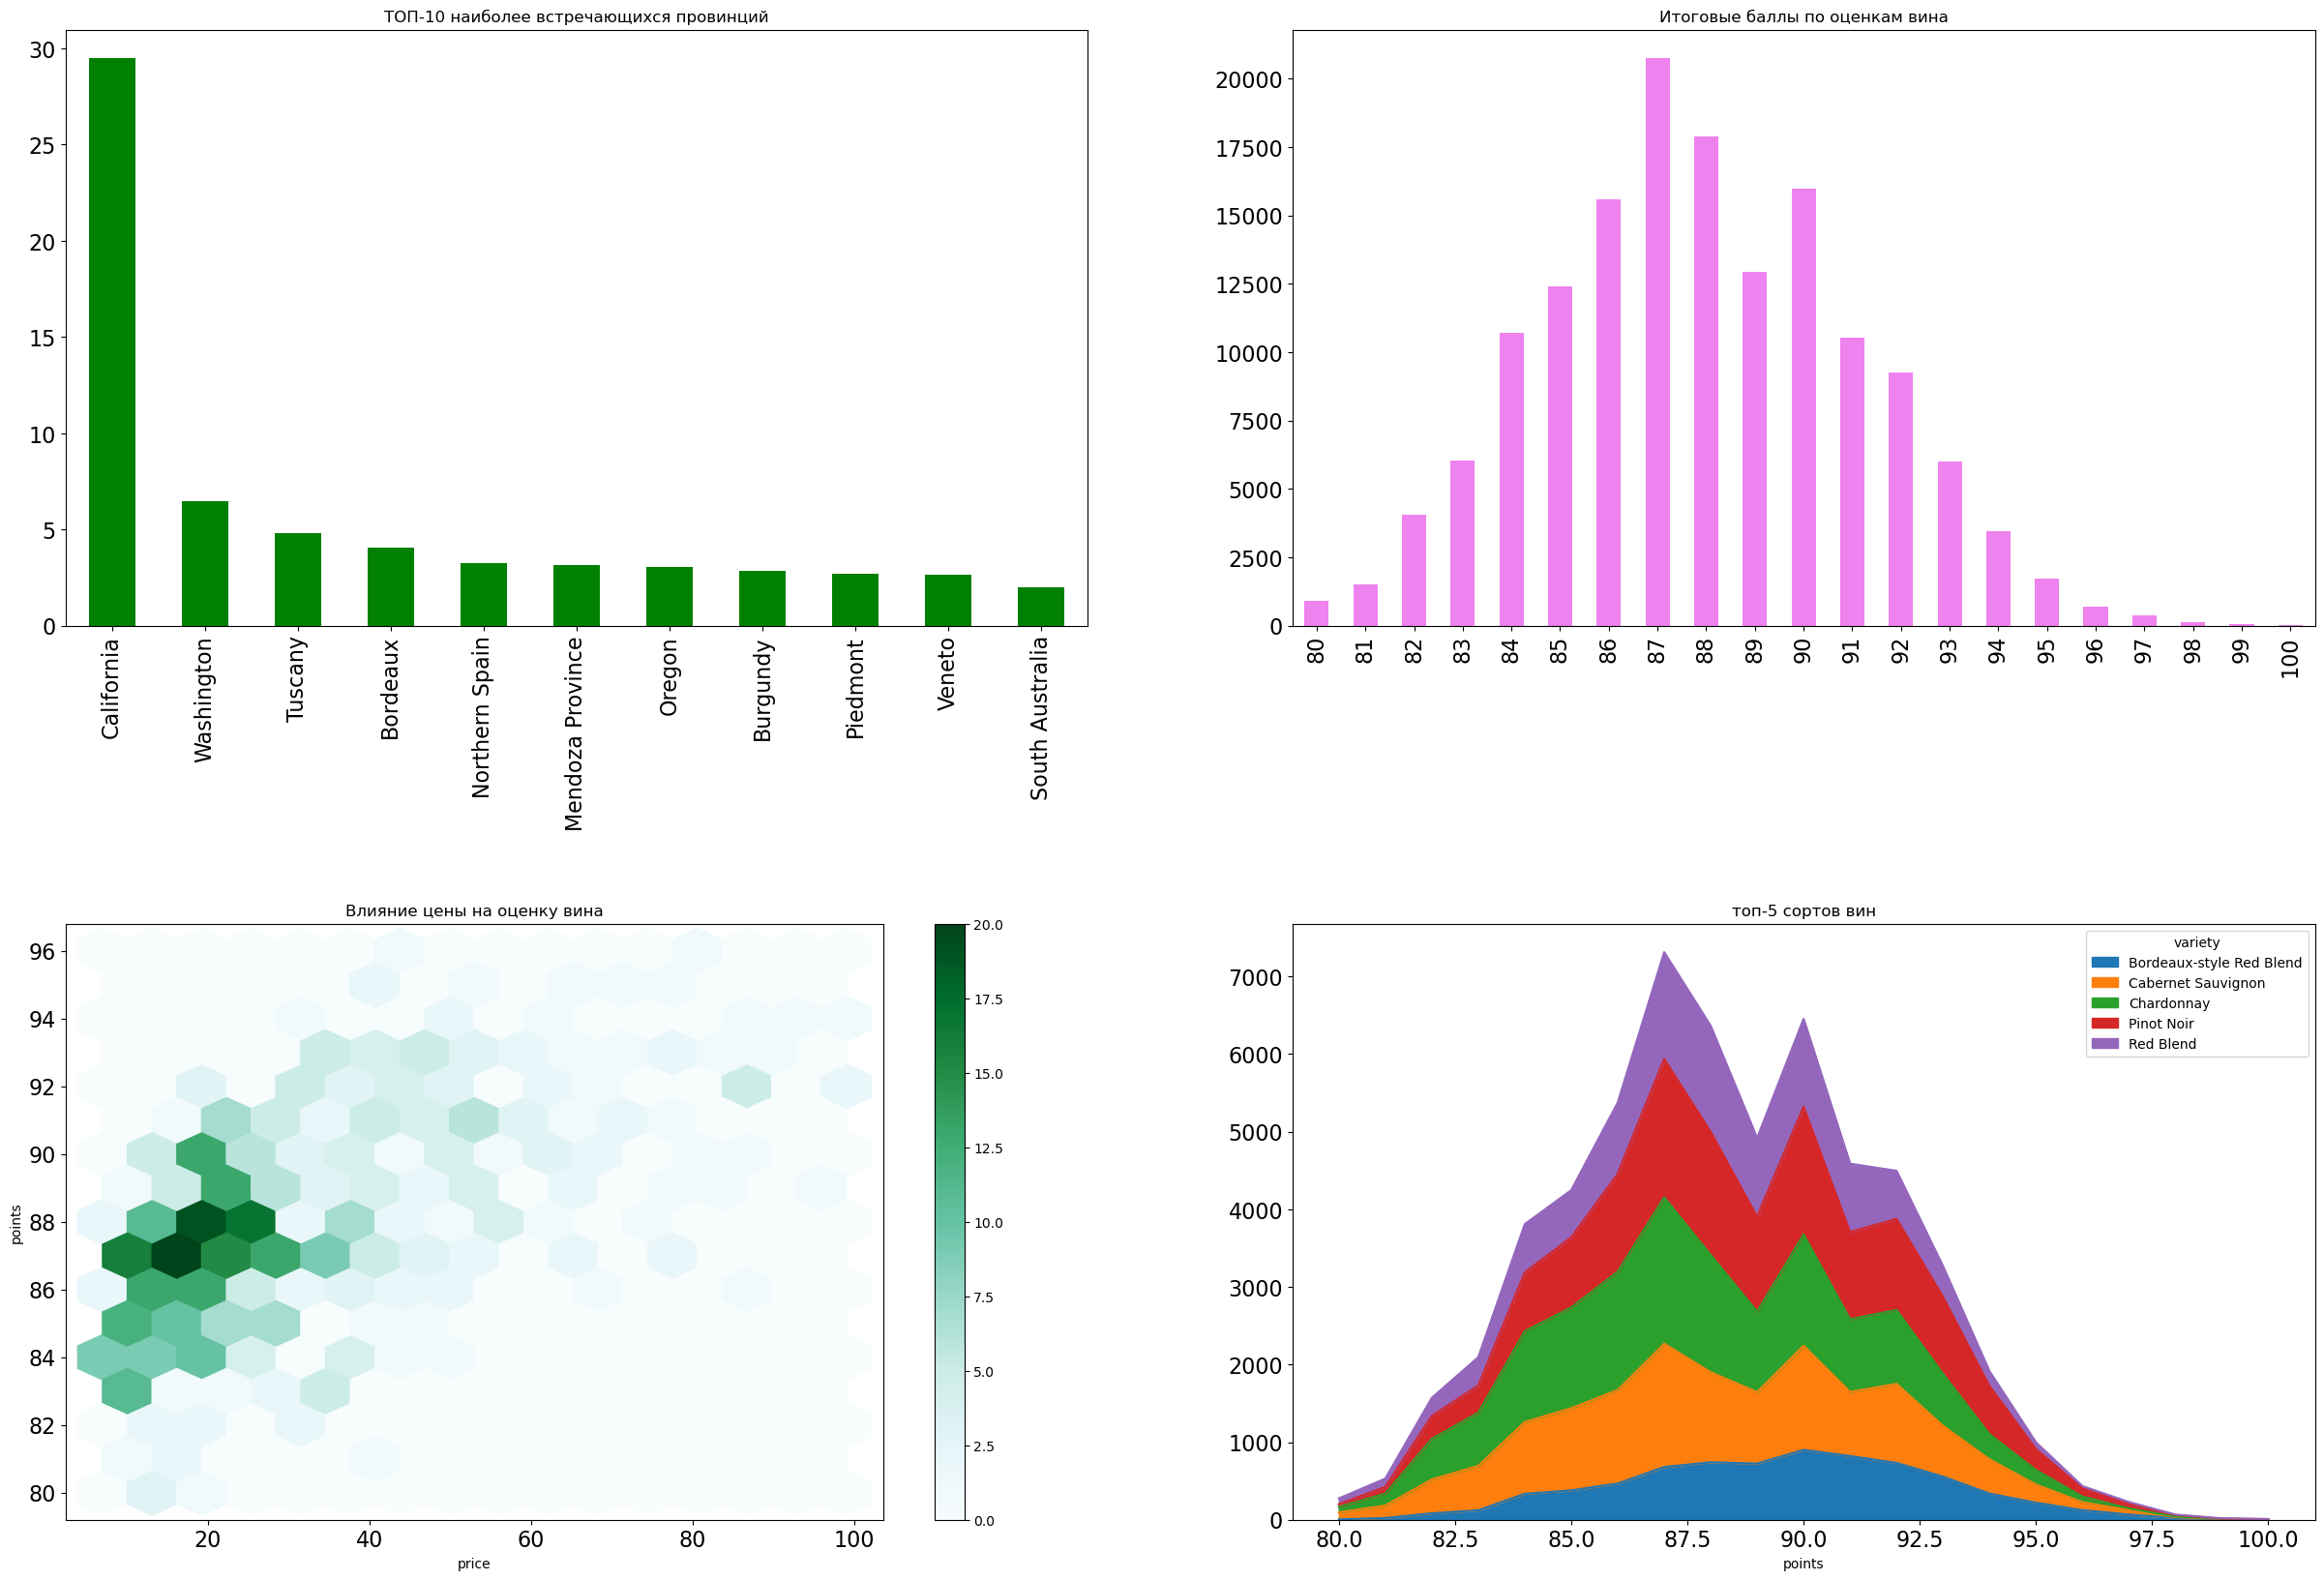

In [129]:
# Дашборд по анализу отзывов о винах
fig, axes = plt.subplots(2, 2, figsize=(30, 20))


axes[0][0].set_title('ТОП-10 наиболее встречающихся провинций')
(reviews['province'].value_counts().iloc[:11] / len(reviews)*100).plot.bar(
    ax=axes[0][0], fontsize=16, color='green')


axes[0][1].set_title('Итоговые баллы по оценкам вина')
reviews['points'].value_counts().sort_index().plot.bar(
    ax=axes[0][1], fontsize=16, color='violet')

axes[1][0].set_title('Влияние цены на оценку вина')
reviews[reviews['price'] < 100].sample(500).plot.hexbin(
    x='price', y='points', gridsize=15,
    ax=axes[1][0], fontsize=16)

axes[1][1].set_title('топ-5 сортов вин')
wine_counts.plot.area(
    ax=axes[1][1], fontsize=16)

plt.subplots_adjust(hspace=0.5)
# reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points')
